In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 10.1 Matrix-Matrix Multiplication

In [2]:
A,B = np.array([[-1.5,3,2],[1,-1,0]]), np.array([[-1,-1],[0,-2],[1,0]])
C = np.matmul(A,B) #J: A*B
C

array([[ 3.5, -4.5],
       [-1. ,  1. ]])

In [3]:
A = np.random.randn(10,3)

In [4]:
G = np.matmul(A.transpose(),A) #ATA; J: A'*A
G[1,1], npl.norm(A[:,1])**2 #Gram matrix (ii) = norm of col i squared

(16.312303167476195, 16.312303167476195)

In [5]:
G[0,2], np.matmul(A[:,0].transpose(),A[:,2]), A[:,0] @ A[:,2] #(ij) = inner of i and j (inner and matmul + transpose are different see: https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

(-0.09969638303049458, -0.09969638303049466, -0.09969638303049466)

In [6]:
m,n,o,p = 2000,50,2000,2000
A,B,C = np.random.randn(m,n), np.random.randn(n,p), np.random.randn(p,o)

timing

In [7]:
LHS = np.matmul(np.matmul(A,B),C)
RHS = np.matmul(A,np.matmul(B,C))

In [8]:
%timeit np.matmul(np.matmul(A,B),C)

108 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%timeit np.matmul(A,np.matmul(B,C))

12 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


LHS and RHS are different by a magnitude of 1

In [10]:
npl.norm(LHS-RHS)

5.238262091967342e-10

In [11]:
%timeit npl.multi_dot([A,B,C])

13.6 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


triple mult shows the slower order is used

# 10.2 Composition of Linear Functions

In [12]:
D = lambda n: np.block([-(np.identity(n-1)),np.vstack(np.zeros(n-1))]) + np.block([np.vstack(np.zeros(n-1)),np.identity(n-1)])
negativediag = np.block([-(np.identity(n-1))])
positivediag = np.block([np.vstack(np.zeros(n-1)),np.identity(n-1)])
mergeddiag = D(5)
# positivediag, negativediag, mergeddiag

delta = np.matmul(D(4),D(5)) #second difference matrix
delta 

array([[ 1., -2.,  1.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  1., -2.,  1.]])

# 10.3 Matrix Power

In [13]:
#finding how many cycles of len(8) there are in an adjacency matrix 
A = np.matrix([[0,1,0,0,1],[1,0,1,0,0],[0,0,1,1,1],[1,0,0,0,0],[0,0,0,1,0]])
A**2
A**8

np.diag(A**8) # number_of_cycles 

matrix([[1, 0, 1, 1, 0],
        [0, 1, 1, 1, 2],
        [1, 0, 1, 2, 1],
        [0, 1, 0, 0, 1],
        [1, 0, 0, 0, 0]])

matrix([[18, 11, 15, 20, 20],
        [25, 14, 21, 28, 26],
        [24, 14, 20, 27, 26],
        [11,  6,  9, 12, 11],
        [ 6,  4,  5,  7,  7]])

array([18, 14, 20, 12,  7])

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.0002 , 0.0002 , 0.0002 , 0.0002 ,
       0.0002 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.045  ,
       0.045  , 0.045  , 0.045  , 0.045  , 0.05415, 0.05415, 0.05415,
       0.05415, 0.05415, 0.04825, 0.04825, 0.04825, 0.04825, 0.04825,
       0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0051 , 0.0051 ,
       0.0051 , 0.0051 , 0.0051 , 0.00035, 0.00035, 0.00035, 0.00035,
       0.00035, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.  

array([0.99214136, 0.99846098, 0.99896916, 0.99930754, 0.99955601,
       0.99971453, 1.01666352, 1.03337697, 1.04998068, 1.06641671,
       1.08276217, 1.12665271, 1.17026879, 1.21384417, 1.25739883,
       1.30092607, 1.33682987, 1.37278246, 1.40887169, 1.44513455,
       1.48148108, 1.48433668, 1.48732153, 1.4902904 , 1.49322704,
       1.49623422, 1.4645592 , 1.43294304, 1.40121367, 1.36944629,
       1.33757135, 1.29428106, 1.25090241, 1.20733845, 1.16362983,
       1.11962   , 1.09637065, 1.07285263, 1.04911008, 1.02518117,
       1.00097489, 0.99349625, 0.98584642, 0.97796344, 0.96984749,
       0.96162445, 0.95796998, 0.95405653, 0.95003034, 0.94570202,
       0.94116952, 0.93694505, 0.93244602, 0.92772317, 0.92242546,
       0.91612622, 0.90985884, 0.90313542, 0.8958132 , 0.8875259 ,
       0.87855864, 0.86874863, 0.85821681, 0.84652275, 0.83401737,
       0.82092647, 0.80594958, 0.78929861, 0.77169897, 0.75255426,
       0.73248513, 0.71009208, 0.68537922, 0.65869482, 0.63002

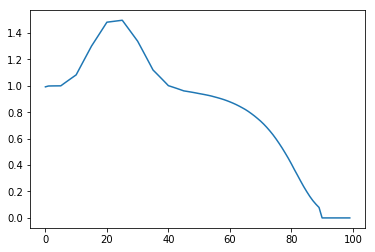

In [14]:
D = {'death_rate': np.array([6.2300e-03, 4.4000e-04, 2.7000e-04, 2.0000e-04, 1.6000e-04,
       1.2000e-04, 1.1000e-04, 1.1000e-04, 1.2000e-04, 1.1000e-04,
       1.0000e-04, 1.3000e-04, 1.3000e-04, 1.5000e-04, 2.0000e-04,
       2.5000e-04, 3.7000e-04, 4.7000e-04, 6.4000e-04, 7.1000e-04,
       7.6000e-04, 8.7000e-04, 8.7000e-04, 8.8000e-04, 9.4000e-04,
       9.2000e-04, 9.5000e-04, 9.3000e-04, 9.9000e-04, 1.0100e-03,
       1.0300e-03, 1.0900e-03, 1.1000e-03, 1.1400e-03, 1.1500e-03,
       1.2000e-03, 1.3100e-03, 1.3700e-03, 1.4600e-03, 1.5600e-03,
       1.6200e-03, 1.8500e-03, 2.0100e-03, 2.1600e-03, 2.4300e-03,
       2.5800e-03, 2.9800e-03, 3.2500e-03, 3.5100e-03, 3.8700e-03,
       4.1300e-03, 4.5400e-03, 4.9400e-03, 5.3300e-03, 5.7100e-03,
       6.0200e-03, 6.7000e-03, 7.1000e-03, 7.6900e-03, 8.2800e-03,
       8.6000e-03, 9.3200e-03, 9.9800e-03, 1.1010e-02, 1.2500e-02,
       1.2820e-02, 1.4040e-02, 1.5150e-02, 1.6870e-02, 1.8300e-02,
       1.9670e-02, 2.1330e-02, 2.3470e-02, 2.5620e-02, 2.8000e-02,
       3.0830e-02, 3.4410e-02, 3.7110e-02, 4.1260e-02, 4.4480e-02,
       4.9640e-02, 5.5390e-02, 6.1490e-02, 6.8030e-02, 7.6730e-02,
       8.5610e-02, 9.5400e-02, 1.0636e-01, 1.1802e-01, 1.3385e-01,
       1.5250e-01, 1.6491e-01, 1.8738e-01, 2.0757e-01, 2.2688e-01,
       2.5196e-01, 2.7422e-01, 2.9239e-01, 3.2560e-01, 3.4157e-01]), 'population': np.array([3.94415, 3.97807, 4.09693, 4.11904, 4.06317, 4.05686, 4.06638,
       4.03058, 4.04649, 4.14835, 4.17254, 4.11442, 4.10624, 4.11801,
       4.16598, 4.24282, 4.31614, 4.39529, 4.50085, 4.58523, 4.51913,
       4.35429, 4.26464, 4.19857, 4.24936, 4.26235, 4.15231, 4.24887,
       4.21525, 4.22308, 4.28567, 3.97022, 3.98685, 3.88015, 3.83922,
       3.95643, 3.80209, 3.93445, 4.12188, 4.3648 , 4.38327, 4.11498,
       4.0761 , 4.10511, 4.2115 , 4.50887, 4.51976, 4.53526, 4.5388 ,
       4.6059 , 4.66029, 4.46463, 4.50085, 4.38035, 4.292  , 4.25471,
       4.03751, 3.93639, 3.79493, 3.64127, 3.62113, 3.4926 , 3.56318,
       3.48388, 2.65713, 2.68076, 2.63914, 2.64936, 2.32367, 2.14232,
       2.04312, 1.94932, 1.86427, 1.73696, 1.68449, 1.62008, 1.47107,
       1.45533, 1.40012, 1.37119, 1.30851, 1.21287, 1.16142, 1.07481,
       0.98572, 0.91472, 0.81421, 0.71291, 0.64062, 0.538  , 0.43556,
       0.34499, 0.28139, 0.21698, 0.16944, 0.12972, 0.09522, 0.06814,
       0.0459 , 0.03227]), 'birth_rate': np.array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.0002 , 0.0002 , 0.0002 , 0.0002 ,
       0.0002 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.0171 , 0.045  ,
       0.045  , 0.045  , 0.045  , 0.045  , 0.05415, 0.05415, 0.05415,
       0.05415, 0.05415, 0.04825, 0.04825, 0.04825, 0.04825, 0.04825,
       0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0225 , 0.0051 , 0.0051 ,
       0.0051 , 0.0051 , 0.0051 , 0.00035, 0.00035, 0.00035, 0.00035,
       0.00035, 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     ])}



#how much each age bracket contributes to the population
b = D["birth_rate"]
d = D["death_rate"]
A = np.block([[b],[np.diag(1-d[0:len(d)-1]),np.vstack(np.zeros(len(d)-1))]])

cf = np.ones(100) @ npl.matrix_power(A,10) #contribution factor

A[0]
cf
plt.plot(cf)

# 10.4 QR Factorization

In [15]:
Q,R = npl.qr(A)
A = np.random.randn(6,4)
Q,R = npl.qr(A)
R
Q

array([[ 1.60654276, -0.1531342 , -1.98709084, -0.60686499],
       [ 0.        , -2.25543603, -0.6956402 ,  0.05211805],
       [ 0.        ,  0.        ,  1.83257235, -0.34669583],
       [ 0.        ,  0.        ,  0.        ,  2.26563436]])

array([[-3.44809856e-01,  2.85917300e-01, -1.45493008e-01,
        -8.37955433e-01],
       [-2.75343783e-01, -7.92736479e-02,  2.67814198e-01,
         1.67546544e-01],
       [ 4.16799577e-02, -7.59441607e-01, -3.15695088e-02,
        -4.14204132e-01],
       [ 4.53923022e-01,  4.84264513e-01, -3.47901937e-01,
        -9.18301548e-02],
       [ 4.69340821e-01, -3.12149883e-01, -5.34882160e-01,
         3.34821496e-04],
       [ 6.14188757e-01,  5.71468651e-02,  7.06382349e-01,
        -2.99601228e-01]])

In [16]:
npl.norm(np.matmul(Q,R)-A)

1.1942156940095655e-15

In [17]:
np.matmul(Q.transpose(),Q)

array([[ 1.00000000e+00, -1.30060250e-16, -4.24995638e-17,
         1.32794912e-16],
       [-1.30060250e-16,  1.00000000e+00,  1.59039808e-16,
         1.05782103e-16],
       [-4.24995638e-17,  1.59039808e-16,  1.00000000e+00,
        -8.79202510e-17],
       [ 1.32794912e-16,  1.05782103e-16, -8.79202510e-17,
         1.00000000e+00]])